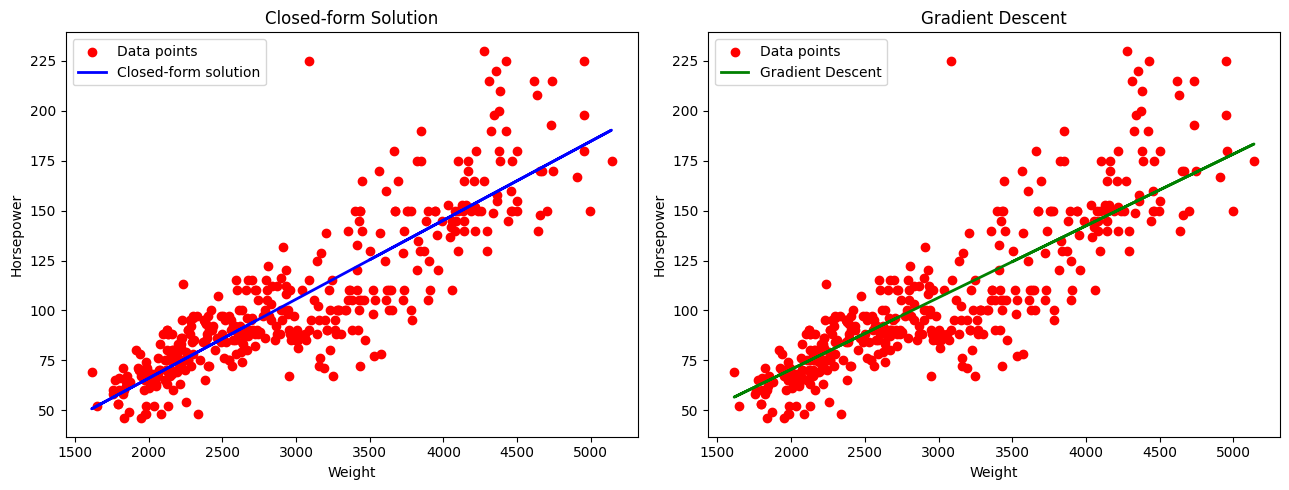

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('proj1Dataset.xlsx')
# Drop NaN values
data = data.dropna()

# Extract features and target
X = data['Weight'].values
y = data['Horsepower'].values

# Add a column of ones to X to account for the intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Closed-form:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
y_pred_cf = X_b.dot(theta_best)

# Gradient Descent:
eta = 0.0000001  # Learning rate
n_iterations = 1000
m = len(X_b)
theta = np.random.randn(2, 1)  # Random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y.reshape(-1, 1))
    theta = theta - eta * gradients

y_pred_gd = X_b.dot(theta)

# Plotting
plt.figure(figsize=(13, 5))

# Closed-form solution plot
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='red', label='Data points')
plt.plot(X, y_pred_cf, color='blue', label='Closed-form solution', linewidth=2)
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Closed-form Solution')
plt.legend()

# Gradient Descent plot
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='red', label='Data points')
plt.plot(X, y_pred_gd, color='green', label='Gradient Descent', linewidth=2)
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Gradient Descent')
plt.legend()

plt.tight_layout()
plt.show()